# Trabajo de Grupo - KNN


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [0]:
#cargamos datos
#df = pd.read_csv('dataset.txt')
df = pd.read_csv('dataset.csv')

names = df.iloc[0]
print(names)
# eliminamos la segunda fila de nombres porque ya existe una cabecera ID, X1, X2, ... Y
df = df.drop(0)

ID            ID
X1     LIMIT_BAL
X2           SEX
X3     EDUCATION
X4      MARRIAGE
X5           AGE
X6         PAY_0
X7         PAY_2
X8         PAY_3
X9         PAY_4
X10        PAY_5
X11        PAY_6
X12    BILL_AMT1
X13    BILL_AMT2
X14    BILL_AMT3
X15    BILL_AMT4
X16    BILL_AMT5
X17    BILL_AMT6
X18     PAY_AMT1
X19     PAY_AMT2
X20     PAY_AMT3
X21     PAY_AMT4
X22     PAY_AMT5
X23     PAY_AMT6
Y              Y
Name: 0, dtype: object


In [0]:
# Mostrar los datos despues de votar los nombres.
df.set_index('ID', inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a numerico.

In [0]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [0]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-811,-2413,-689,0,0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,-957,957,590,183,-194,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,-15212,-468,772,617,601,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1243,1058,-20977,645,588,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2947,30165,-14895,-1794,-15,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


## Dividir entre entrenamiento(24,000), validacion(3,000), test (3,000)

In [0]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)


In [0]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
dftv = pd.concat([X_entrenval, y_entrenval], axis=1)

# balanceando los datos

In [0]:
# Corregir desbalancia.
# Crear nuevo entren dataframe
balance = y_entren.value_counts()
num_muestras = balance[0]-balance[1]
print('balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entren = pd.concat([X_entren, y_entren], axis=1)
deudores = Xy_entren[Xy_entren['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entren_os = pd.concat([Xy_entren, mas_deudores])
X_entren_os = Xy_entren_os.drop('Y', axis=1)
y_entren_os = Xy_entren_os['Y']
print('neuvo balance=\n', y_entren_os.value_counts())

balance=
 0    18638
1     5362
Name: Y, dtype: int64 
num muestras= 13276
neuvo balance=
 1    18638
0    18638
Name: Y, dtype: int64


# Función para tomar sqrt de montos

In [0]:
# Compensar por oblicuidad de la distribucion del dinero.
# Función para aplicar a cualquier X (entran, val, test, entran_os)
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
def sqrt_monto(X):
    for x in cols_monto:
        #print(x)
        X.loc[X[x]>0, x] = np.sqrt(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = -np.sqrt(np.absolute((X.loc[X[x]<0,x])))

X_entren_os_tr = X_entren_os.copy()
#print(X_entren_os_tr.describe())
sqrt_monto(X_entren_os_tr)
#print(X_entren_os_tr.describe())
X_val_tr = X_val.copy()
sqrt_monto(X_val_tr)

# Preparar X_test_tr tambien.
X_test_tr = X_test.copy()
sqrt_monto(X_test_tr)

In [0]:
# Ver los variables despues de transformacion.
# X12 ... X23 están transformados.
X_entren_os_tr.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,3.727600e+04,3.727600e+04,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000,37276.000000
mean,153702.025968,1.589575,1.868146,1.546491,35.489645,0.237552,0.086249,0.025593,-0.043755,-0.110929,-0.146743,173.547925,169.523692,164.955344,157.520177,150.961844,146.531182,50.180630,49.613505,45.658212,43.277243,43.630816,44.078808,-1761.872599,-2.239429e+03,-3.577305e+03,-2789.673570,-1481.230014,0.448236,0.438600,0.419403,0.387080,0.360610,0.346287,0.414721,0.547237,0.392309,0.255458,0.405039
std,126101.996264,0.491917,0.769522,0.521835,9.394479,1.266050,1.346478,1.337341,1.323103,1.289615,1.301573,141.597890,140.289636,137.837802,133.510132,130.635261,130.179308,48.327728,50.113056,48.661901,47.983234,48.278315,52.411688,20701.788513,2.384256e+04,2.392397e+04,20709.968401,19230.792048,0.410832,0.406198,0.395436,0.375546,0.360512,0.356219,23.061761,34.668816,23.045814,0.700772,9.586927
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-406.915225,-264.153365,-396.565253,-412.310563,-247.733728,-457.220953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-470400.000000,-4.489110e+05,-1.542332e+06,-432730.000000,-446948.000000,-0.619892,-1.395540,-1.025100,-1.374500,-0.876743,-0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,58.529907,53.902690,51.156622,47.159304,40.978650,33.922706,19.748418,19.748418,12.247449,2.596686,0.000000,0.000000,-1674.000000,-2.011000e+03,-2.746000e+03,-2091.000000,-1259.250000,0.024149,0.019758,0.017948,0.015112,0.011322,0.008174,0.034259,0.030769,0.012461,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.945568,144.211650,141.462009,138.021737,134.848063,132.030299,44.721360,44.721360,38.729833,34.641016,36.055513,34.756294,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.383360,0.370155,0.339880,0.305773,0.269667,0.237528,0.055142,0.054295,0.044289,0.039924,0.041204
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.335590,247.769549,241.042009,227.593936,221.399526,219.497153,67.093218,65.779936,62.134933,59.160798,59.249472,59.238923,1441.000000,1.346250e+03,1.008000e+03,929.000000,1100.000000,0.855000,0.842300,0.807522,0.725085,0.660070,0.633482,0.264046,0.251321,0.166115,0.146211,0.179778
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,982.095209,991.932961,1289.995736,944.238317,962.897191,980.644686,710.633520,1297.790045,946.593894,727.253051,653.091877,727.094217,489972.000000,1.682177e+06,4.299810e+05,487241.000000,414369.000000,5.309500,5.456200,4.558050,4.645500,4.935500,2.442067,4444.333333,5001.000000,4444.333333,68.027211,690.655172


# Función para representar pagos como variables numericos y categoricales

In [0]:
# Construir varibles categorical y numerical por pagos.
cols_pago = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
cols_pago_cat = ['X6cat', 'X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
def cat_num_pago(X):
    for x in cols_pago:
        xcat = x+'cat'
        X[xcat] = X[x]
        X.loc[X[xcat]>0, xcat] = 1
        X[xcat] = X[xcat].astype('category')
        xnum = x+'num'
        X[xnum] = X[x]
        X.loc[X[xnum]<0, xnum] = 0
        
    
X_entren_os_tr_pago = X_entren_os_tr.copy()    
cat_num_pago(X_entren_os_tr_pago)
X_entren_os_tr_pago.drop(columns=cols_pago, inplace=True)

X_val_tr_pago = X_val_tr.copy()
cat_num_pago(X_val_tr_pago)
X_val_tr_pago.drop(columns=cols_pago, inplace=True)

# Preparar X_text_tr_pago tambien.
X_test_tr_pago = X_test_tr.copy()
cat_num_pago(X_test_tr_pago)
X_test_tr_pago.drop(columns=cols_pago, inplace=True)



#X_entren_os_tr = pd.get_dummies(X_entren_os_tr, prefix = cols_pago, columns=cols_pago_cat)
#X_val_tr = pd.get_dummies(X_val_tr, prefix = cols_pago, columns=cols_pago_cat)
#X_test_tr = pd.get_dummies(X_test_tr, prefix = cols_pago, columns=cols_pago_cat)

In [0]:
X_entren_os_tr_pago.head()
#X_val_tr_pago.head()
#X_test_tr_pago.head()

,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X6cat,X6num,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28512,190000,2,1,1,47,438.740242,439.655547,439.772669,439.633939,439.267572,439.362038,84.852814,84.982351,85.440037,84.261498,85.906926,84.852814,804,103,-122,-322,83,1.013121,1.017353,1.017895,1.017253,1.015558,1.015995,0.037248,0.037342,0.037769,0.036796,0.038231,0,0,0,0,0,0,0,0,0,0,0,0
28999,360000,2,1,1,43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,-2,0,-2,0,-2,0,-2,0,-2,0
19354,50000,2,2,1,43,174.728361,203.617288,147.976349,152.983659,0.000000,0.000000,44.721360,44.721360,44.721360,0.000000,0.000000,0.000000,10930,-19563,1507,-23404,0,0.610600,0.829200,0.437940,0.468080,0.000000,0.000000,0.048239,0.091337,0.085455,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,-2,0
4370,220000,2,2,1,34,331.383464,302.263130,305.108178,302.829985,302.899323,305.386640,60.282667,59.715995,58.258047,60.489669,60.827625,56.418082,-18452,1728,-1385,42,1513,0.499159,0.415286,0.423141,0.416845,0.417036,0.423914,0.039775,0.038307,0.037010,0.039881,0.039674,0,0,0,0,0,0,0,0,0,0,0,0
22302,400000,2,2,1,30,262.364251,246.067064,251.091617,255.945307,258.754710,261.554966,50.990195,54.772256,54.772256,44.721360,44.743715,54.954527,-8286,2498,2461,1446,1457,0.172088,0.151372,0.157617,0.163770,0.167385,0.171027,0.042940,0.047584,0.045796,0.029871,0.029264,0,0,0,0,0,0,0,0,0,0,0,0


## Funcion de costo adaptado  

In [0]:
# Función de costo y exatitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)

## Mostar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [0]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combine the procedures
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)



# **Capacitar entren+val para usar para entren y test**

In [0]:
## Hay que corregir por la desbalancia en entrenval tambien,
## para cuando estamos listo para el 'test'.
balance = y_entrenval.value_counts()
num_muestras = balance[0]-balance[1]
print('entran+val: balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entrenval = pd.concat([X_entrenval, y_entrenval], axis=1)
deudores = Xy_entrenval[Xy_entrenval['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entrenval_os = pd.concat([Xy_entrenval, mas_deudores])
X_entrenval_os = Xy_entrenval_os.drop('Y', axis=1)
y_entrenval_os = Xy_entrenval_os['Y']
print('entren+val: neuvo balance=\n', y_entrenval_os.value_counts())

# Preparar X_entrenval_os_tr tambien
# Pare cuando hacemos el test.
X_entrenval_os_tr = X_entrenval_os.copy()
sqrt_monto(X_entrenval_os_tr)

# Preparar X_entrenval_os_tr_pago tambien.
X_entrenval_os_tr_pago = X_entrenval_os_tr.copy()
cat_num_pago(X_entrenval_os_tr_pago)
X_entrenval_os_tr_pago.drop(columns=cols_pago, inplace=True)

entran+val: balance=
 0    20993
1     6007
Name: Y, dtype: int64 
num muestras= 14986
entren+val: neuvo balance=
 1    20993
0    20993
Name: Y, dtype: int64


# KNN


Entrenamiento
Exactitud:     0.7914583333333334
Precisión:     0.6526946107784432
Exhaustividad: 0.1422976501305483
AUC:           0.5602570984851689
Costo por cliente: 0.94325

Validacion
Exactitud:     0.7743333333333333
Precisión:     0.3961038961038961
Exhaustividad: 0.09457364341085271
AUC:           0.52754159877549
Costo por cliente: 0.984



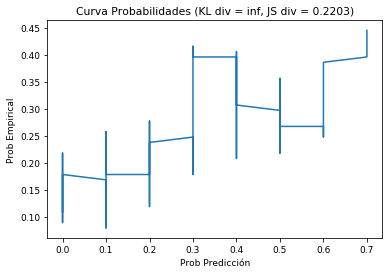

In [0]:
# Uso KNN
# Caso simple, ningun ajusto a los parametros por defecto.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_entren, y_entren)


#función de costo
print('\nEntrenamiento')
custom_cost(knn, X_entren, y_entren)
print('\nValidacion')
custom_cost(knn, X_val, y_val)
print()
#mostrar probabilidades empiricales vs predicción
y_val_prob = knn.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)

# Busqueda del Optimo en KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_entren, y_entren)


#función de costo
print('\nEntrenamiento')
custom_cost(knn, X_entren, y_entren)
print('\nValidacion')
custom_cost(knn, X_val, y_val)
print()
#mostrar probabilidades empiricales vs predicción
y_val_prob = knn.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)

In [0]:
# Función para buscar el mejor costo de validacion.
import sys
from sklearn.neighbors import KNeighborsClassifier

def imprimirCalidad(calidad):
    print('Exactitud:    ',  calidad.accuracy)
    print('Precisión:    ', calidad.precision)
    print('Exhaustividad:', calidad.recall)
    print('AUC:          ', calidad.AUC)
    print('Costo por cliente:', calidad.cost)


def mejorKNN(X_entren, y_entren, X_val, y_val,
                 n_neighbors_list=[20], printdetail=False):
    
    _cost = sys.float_info.max
    
    for n_neighbors in n_neighbors_list:
        miKNN = KNeighborsClassifier(n_neighbors = n_neighbors)
        miKNN.fit(X_entren, y_entren)

        if printdetail:
            print('\n* Parametros *')
            print('num_estimators =', n_est)
            print('min_impurity_decrease =', min_imp)
            print('max_depth =', max_depth)
            print('\nEntrenamiento')
            entren_cost = custom_cost(miKNN, X_entren, y_entren, True)
            print('\nValidacion')
            val_cost = custom_cost(miKNN, X_val, y_val, True)
        else:
            entren_cost = custom_cost(miKNN, X_entren, y_entren, False)
            val_cost = custom_cost(miKNN, X_val, y_val, False)

        if _cost > val_cost.cost:
            _cost = val_cost.cost
            _n_neighbors = n_neighbors
            _entren_cost = entren_cost
            _val_cost = val_cost
            _miKNN = miKNN

    print('\n*** Mejor Resultado ***')
    print('\nParametro:')
    print('n_neighbors =', _n_neighbors)
    print('\nEntrenamiento')
    imprimirCalidad(_entren_cost)
    print('\nValidacion')
    imprimirCalidad(_val_cost)

    print('\nProbabilidad de no pagar')
    y_val_prob = _miKNN.predict_proba(X_val)[:,1] # Using probability of category +1
    mostrarPQ(y_val, y_val_prob)


*** Summilla - Mejor Resultados ***

Parametro:
n_neighbors = 3

Entrenamiento
Exactitud:     0.8432083333333333
Precisión:     0.7228882074156677
Exhaustividad: 0.4835882133532264
AUC:           0.7151281553942868
Costo por cliente: 0.51025

Validacion
Exactitud:     0.737
Precisión:     0.34210526315789475
Exhaustividad: 0.24186046511627907
AUC:           0.557235965042216
Costo por cliente: 0.863

Probabilidad de no pagar


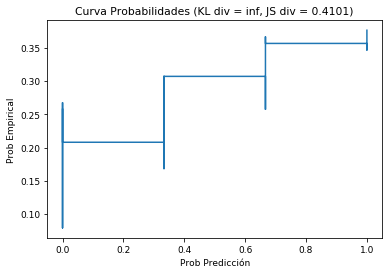

In [0]:
# Optimizar con datos originales. Podemos usar los otros datos tambien.
mejorKNN(X_entren, y_entren, X_val, y_val, 
             n_neighbors_list=[3,4,5,6,7,8,9,10],#,15,20,50, 100], 
             printdetail=False)